# Final IRRBB Gap Analysis


The desired purpose of this code is to be able to record instruments and calculate the Gap Analysis Repricing, using a cash flow generator, visulazing the gap analysis.
~~
The code will be partioned in the following way:
1. DataFrame where instruments (Bonds) will be recorded (inputed) and given an identification symbol.
2. A cashflow generating script which will be used to calculate Gap Analysis, outputting a DataFrame.
3. A visulazing (Line Graph) script where the timestamped intruments will be delegated into buckets, the script will visualize the conclusions made in part 2.

# Part 1

## DataFrame Input

The cash flow generator is a calculator which will calculate coupon payments based on these parameters. It will generate a dataframe named 'cf' below. The problem that arose is finding an appropriate library which allows us to properly acustom coupon dates. This is the code that stagnated the IRRBB Gap Analysis code.

The following variables will be used as input, to calculate Cash Flows:
1. ID
2. Type
3. Name
4. Face Value
5. Coupon Rate
6. Period
7. Currency
8. Start Date
9. End Date
10. Maturity
11. Compound
12. Coupon Start

### Setting Variables


Let's define the above specified variables in a random example using 3 bonds. For future reference let's define a User Defined Function that is available to append instruments when user gives parameters for variables.

The expiration date is either the last day or only day on which the instrument can be exercised. In contrast, the maturity date is the day on which the underlying transaction settles when an instrument is applied.

In [421]:
import pandas as pd
import numpy as np
from datetime import datetime

variables = ['ID','Type','Name','Face_value','Coupon Rate','Period','Currency','Start_Date','End_Date','Maturity','Compound','Coupon Start']
print(variables)

ID = [1,2,3]
Type = ['Bond','Bond','Bond']
Name = ['Bond A', 'Bond B', 'Bond C']
#Dollar Amoount
Face_Value = [1e4,1e6,1e5]
#Percentage
Coupon_Rate = [3.00,3.25,2.88]
# In Months
Coupon_Period = [12,12,12]
Currency = ['USD','EUR','EUR']
Start_date = ['2.1.2023','2.1.2023','2.1.2023']
Maturity = ['2.1.2025','2.1.2028','2.1.2033']
Compound = ['M','M','M']
Coupon_Start = ['2.1.2023','15.5.2023','2.1.2023']
Expiration_Date = ['1.1.2025','1.1.2028','1.1.2033']


['ID', 'Type', 'Name', 'Face_value', 'Coupon Rate', 'Period', 'Currency', 'Start_Date', 'End_Date', 'Maturity', 'Compound', 'Coupon Start']


### Converting to DataFrame

The following code use the above supplied variables and creates a pandas DataFrame out of them.

In [422]:
variables_dict = {'ID':ID,
                  'Type':Type,
                  'Name':Name,
                  'Face Value':Face_Value,
                  'Coupon Rate':Coupon_Rate,
                  'Coupon Period':Coupon_Period,
                  'Currency':Currency,
                  'Start Date':Start_date,
                  'Maturity':Maturity,
                  'Compound':Compound,
                 'Coupon Start':Coupon_Start,
                 'Expiration Date':Expiration_Date}
print(variables_dict)
variables_df = pd.DataFrame.from_dict(variables_dict)
variables_df.set_index('ID')

{'ID': [1, 2, 3], 'Type': ['Bond', 'Bond', 'Bond'], 'Name': ['Bond A', 'Bond B', 'Bond C'], 'Face Value': [10000.0, 1000000.0, 100000.0], 'Coupon Rate': [3.0, 3.25, 2.88], 'Coupon Period': [12, 12, 12], 'Currency': ['USD', 'EUR', 'EUR'], 'Start Date': ['2.1.2023', '2.1.2023', '2.1.2023'], 'Maturity': ['2.1.2025', '2.1.2028', '2.1.2033'], 'Compound': ['M', 'M', 'M'], 'Coupon Start': ['2.1.2023', '15.5.2023', '2.1.2023'], 'Expiration Date': ['1.1.2025', '1.1.2028', '1.1.2033']}


,Type,Name,Face Value,Coupon Rate,Coupon Period,Currency,Start Date,Maturity,Compound,Coupon Start,Expiration Date
ID,,,,,,,,,,,
1,Bond,Bond A,10000.0,3.00,12,USD,2.1.2023,2.1.2025,M,2.1.2023,1.1.2025
2,Bond,Bond B,1000000.0,3.25,12,EUR,2.1.2023,2.1.2028,M,15.5.2023,1.1.2028
3,Bond,Bond C,100000.0,2.88,12,EUR,2.1.2023,2.1.2033,M,2.1.2023,1.1.2033


# Part 2

## Cash Flow Calculations

A cashflow generating script which will be used to calculate Gap Analysis, outputting a DataFrame.

In [423]:
variables_df['Start Date'] = pd.to_datetime(variables_df['Start Date'])
variables_df['Maturity'] = pd.to_datetime(variables_df['Maturity'])
variables_df['Coupon Start'] = pd.to_datetime(variables_df['Coupon Start'])
variables_df['Expiration Date'] = pd.to_datetime(variables_df['Expiration Date'])

print(type(variables_df['Start Date'][1]))
variables_df = pd.DataFrame.from_dict(variables_dict)
variables_df.set_index('ID')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Type,Name,Face Value,Coupon Rate,Coupon Period,Currency,Start Date,Maturity,Compound,Coupon Start,Expiration Date
ID,,,,,,,,,,,
1,Bond,Bond A,10000.0,3.00,12,USD,2.1.2023,2.1.2025,M,2.1.2023,1.1.2025
2,Bond,Bond B,1000000.0,3.25,12,EUR,2.1.2023,2.1.2028,M,15.5.2023,1.1.2028
3,Bond,Bond C,100000.0,2.88,12,EUR,2.1.2023,2.1.2033,M,2.1.2023,1.1.2033


In [424]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

variables_df['Start Date'] = pd.to_datetime(variables_df['Start Date'])
variables_df['Maturity'] = pd.to_datetime(variables_df['Maturity'])
variables_df['Coupon Start'] = pd.to_datetime(variables_df['Coupon Start'])
variables_df['Expiration Date'] = pd.to_datetime(variables_df['Expiration Date'])
variables_df['Cash Flow Period'] =  variables_df['Maturity'] - variables_df['Coupon Start'] 
print(variables_df['Start Date'][0])
print(type(variables_df['Start Date'][0]))
print(variables_df['Cash Flow Period'][0])
print(variables_df)

2023-02-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
731 days 00:00:00
   ID  Type    Name  Face Value  Coupon Rate  Coupon Period Currency  \
0   1  Bond  Bond A     10000.0         3.00             12      USD   
1   2  Bond  Bond B   1000000.0         3.25             12      EUR   
2   3  Bond  Bond C    100000.0         2.88             12      EUR   

  Start Date   Maturity Compound Coupon Start Expiration Date Cash Flow Period  
0 2023-02-01 2025-02-01        M   2023-02-01      2025-01-01         731 days  
1 2023-02-01 2028-02-01        M   2023-05-15      2028-01-01        1723 days  
2 2023-02-01 2033-02-01        M   2023-02-01      2033-01-01        3653 days  


Cash flow Calculations

In [425]:
from datetime import *; from dateutil.relativedelta import *
import calendar

def cshflwQuarterly(ID):
    StartDate = variables_df['Coupon Start'][ID]
    Maturity = 24
    Coupon = Maturity / 3
    EndDate = StartDate + relativedelta(months=Maturity)
    Quarter = relativedelta(months=3)
    print(StartDate);print(EndDate)
    cf = pd.date_range(start=StartDate,end=EndDate,freq='3M')
    cf = cf.strftime('%Y-%m-%d')
    cf = pd.DataFrame(cf,columns=['Cash Flow Dates Quarterly'])
    print(cf)
    
cshflwQuarterly(0)

2023-02-01 00:00:00
2025-02-01 00:00:00
  Cash Flow Dates Quarterly
0                2023-02-28
1                2023-05-31
2                2023-08-31
3                2023-11-30
4                2024-02-29
5                2024-05-31
6                2024-08-31
7                2024-11-30


In [426]:
from datetime import *; from dateutil.relativedelta import *
import calendar

def cshflwYearly(ID,Years_Maturity):
    StartDate = variables_df['Coupon Start'][ID]
    Maturity = Years_Maturity
    EndDate = StartDate + relativedelta(years=Maturity)
    print(StartDate);print(EndDate)
    cf = pd.date_range(start=StartDate,end=EndDate,periods=Maturity,normalize=True)
    cf = cf.strftime('%Y-%m-%d')
    cf = pd.DataFrame(cf,columns=['Cash Flow Dates Yearly'])
    print(cf)

    
    
cshflwYearly(0,2)

2023-02-01 00:00:00
2025-02-01 00:00:00
  Cash Flow Dates Yearly
0             2023-02-01
1             2025-02-01


In [427]:
from datetime import *; from dateutil.relativedelta import *
import calendar

def cshflwMonthly(ID,Months_Maturity):
    StartDate = variables_df['Coupon Start'][ID]
    Maturity = Months_Maturity
    EndDate = StartDate + relativedelta(months=Maturity)
    print(StartDate);print(EndDate)
    cf = pd.date_range(start=StartDate,end=EndDate,periods=Maturity,normalize=True)
    cf = cf.strftime('%Y-%m-%d')
    cf = pd.DataFrame(cf,columns=['Cash Flow Dates Monthly'])
    print(type(cf))
    
cshflwMonthly(0,12)


2023-02-01 00:00:00
2024-02-01 00:00:00
<class 'pandas.core.frame.DataFrame'>


# Part 3

## Cash Flows Visualisation


As part 2 was not completed as a relevant Cash Flow DataFrame could not be calculated using the input in part 1, I decided to create an excel which mimicks the behaviour which should have been observed in Part 2 and import it.

In [428]:
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta                                                                                                                  
from datetime import date 
from pandas.core.groupby.grouper import get_grouper
import waterfall_chart
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [429]:
cf = pd.read_excel('IRRBB CashFlows.xlsx')
cf.set_index('ISIN')


,Date,CF,Principal/Coupon,Type_Portfolios
ISIN,,,,
A001,2022-08-03,156.222007,P,Bonds & Investments
A001,2022-08-04,103.510986,C,Bonds & Investments
A001,2022-08-05,728.130437,C,Bonds & Investments
A001,2022-08-06,71.245698,C,Bonds & Investments
A001,2022-08-07,590.215916,C,Bonds & Investments
...,...,...,...,...
A021,2049-06-01,-1815.043247,C,Deposits Corporate
A021,2049-07-01,-8884.837190,C,Deposits Corporate
A021,2049-08-01,-3933.084474,C,Deposits Corporate


In [430]:
print(type(cf['Date'][2]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [431]:
overnight = pd.date_range(start='8/3/2022',end='8/4/2022')
m1_m3 = pd.date_range(start='8/4/2022',end='11/3/2022')
m3_m6 = pd.date_range(start='11/3/2022',end='2/3/2023')
m6_m9 = pd.date_range(start='2/3/2023',end='5/3/2023')
m9_y1 = pd.date_range(start='5/3/2023',end='8/3/2023')
y1_y1_5 = pd.date_range(start='8/3/2023',end='2/3/2024')
y1_5_y2 = pd.date_range(start='2/3/2024',end='8/3/2024')
y2_y3 = pd.date_range(start='8/3/2024',end='8/3/2025')
y3_y4 = pd.date_range(start='8/3/2025',end='8/3/2026')
y4_y5 = pd.date_range(start='8/3/2026',end='8/3/2027')
y5_y6 = pd.date_range(start='8/3/2027',end='8/3/2028')
y6_y7 = pd.date_range(start='8/3/2028',end='8/3/2029')
y7_y8 = pd.date_range(start='8/3/2029',end='8/3/2030')
y8_y9 = pd.date_range(start='8/3/2030',end='8/3/2031')
y9_y10 = pd.date_range(start='8/3/2031',end='8/3/2032')
y10_y15 = pd.date_range(start='8/3/2032',end='8/3/2037')
y15_y20 = pd.date_range(start='8/3/2037',end='8/3/2042')
y20_= pd.date_range(start='8/3/2042',end='8/3/2062')

In [432]:
overnight_c = cf[cf['Date'].isin(overnight)]['CF'].sum()
m1_m3_c = cf[cf['Date'].isin(m1_m3)]['CF'].sum()
m3_m6_c = cf[cf['Date'].isin(m3_m6)]['CF'].sum()
m6_m9_c = cf[cf['Date'].isin(m6_m9)]['CF'].sum()
m9_y1_c = cf[cf['Date'].isin(m9_y1)]['CF'].sum()
y1_y1_5_c = cf[cf['Date'].isin(y1_y1_5)]['CF'].sum()
y1_5_y2_c = cf[cf['Date'].isin(y1_5_y2)]['CF'].sum()
y2_y3_c = cf[cf['Date'].isin(y2_y3)]['CF'].sum()
y3_y4_c = cf[cf['Date'].isin(y3_y4)]['CF'].sum()
y4_y5_c = cf[cf['Date'].isin(y4_y5)]['CF'].sum()
y5_y6_c = cf[cf['Date'].isin(y5_y6)]['CF'].sum()
y6_y7_c = cf[cf['Date'].isin(y6_y7)]['CF'].sum()
y7_y8_c = cf[cf['Date'].isin(y7_y8)]['CF'].sum()
y8_y9_c = cf[cf['Date'].isin(y8_y9)]['CF'].sum()
y9_y10_c = cf[cf['Date'].isin(y9_y10)]['CF'].sum()
y10_y15_c = cf[cf['Date'].isin(y10_y15)]['CF'].sum()
y15_y20_c = cf[cf['Date'].isin(y15_y20)]['CF'].sum()
y20_c = cf[cf['Date'].isin(y20_)]['CF'].sum()


output_dic = {'Overnight':overnight_c,'1M<T<3M': m1_m3_c,'3M<T<6M':m3_m6_c,
          '6M<T<9M':m6_m9_c,'9M<T<1Y':m9_y1_c,'1Y<T<1.5Y':y1_y1_5_c,
          '1.5Y<T<2Y':y1_5_y2_c,'2Y<T<3Y':y2_y3_c,'3Y<T<4Y':y3_y4_c,
          '4Y<T<5Y':y4_y5_c,'5Y<T<6Y':y5_y6_c,'6Y<T<7Y':y6_y7_c,
          '7Y<T<8Y':y7_y8_c,'8Y<T<9Y':y8_y9_c,'9Y<T<10Y':y9_y10_c,
          '10Y<T<15Y':y10_y15_c,'15Y<T<20Y':y15_y20_c,'T>20Y':y20_c
        }


In [433]:
output_dic

{'Overnight': 713.1964416995805,
 '1M<T<3M': -15249.314352101457,
 '3M<T<6M': -98220.4033461479,
 '6M<T<9M': -95357.81638493162,
 '9M<T<1Y': -367.05251999125903,
 '1Y<T<1.5Y': -372180.8739105056,
 '1.5Y<T<2Y': 13451.082156822358,
 '2Y<T<3Y': 38110.06646813283,
 '3Y<T<4Y': 164002.5673994537,
 '4Y<T<5Y': 229986.96835232814,
 '5Y<T<6Y': 23174.928496940644,
 '6Y<T<7Y': 119166.648194076,
 '7Y<T<8Y': 78022.49321327897,
 '8Y<T<9Y': 97470.52634731164,
 '9Y<T<10Y': 68176.39917127225,
 '10Y<T<15Y': 362058.17932696885,
 '15Y<T<20Y': -541546.5345535146,
 'T>20Y': -149396.710490932}

In [434]:
output_pd = pd.DataFrame.from_dict(output_dic,orient='index')
output_pd.columns = ['Cash Flow']
output_pd

,Cash Flow
Overnight,713.196442
1M<T<3M,-15249.314352
3M<T<6M,-98220.403346
6M<T<9M,-95357.816385
9M<T<1Y,-367.052520
1Y<T<1.5Y,-372180.873911
1.5Y<T<2Y,13451.082157
2Y<T<3Y,38110.066468
3Y<T<4Y,164002.567399
4Y<T<5Y,229986.968352


In [435]:
{'Overnight':overnight_c,'1M<T<3M': m1_m3_c,'3M<T<6M':m3_m6_c,
          '6M<T<9M':m6_m9_c,'9M<T<1Y':m9_y1_c,'1Y<T<1.5Y':y1_y1_5_c,
          '1.5Y<T<2Y':y1_5_y2_c,'2Y<T<3Y':y2_y3_c,'3Y<T<4Y':y3_y4_c,
          '4Y<T<5Y':y4_y5_c,'5Y<T<6Y':y5_y6_c,'6Y<T<7Y':y6_y7_c,
          '7Y<T<8Y':y7_y8_c,'8Y<T<9Y':y8_y9_c,'9Y<T<10Y':y9_y10_c,
          '10Y<T<15Y':y10_y15_c,'15Y<T<20Y':y15_y20_c,'T>20Y':y20_c}

{'Overnight': 713.1964416995805,
 '1M<T<3M': -15249.314352101457,
 '3M<T<6M': -98220.4033461479,
 '6M<T<9M': -95357.81638493162,
 '9M<T<1Y': -367.05251999125903,
 '1Y<T<1.5Y': -372180.8739105056,
 '1.5Y<T<2Y': 13451.082156822358,
 '2Y<T<3Y': 38110.06646813283,
 '3Y<T<4Y': 164002.5673994537,
 '4Y<T<5Y': 229986.96835232814,
 '5Y<T<6Y': 23174.928496940644,
 '6Y<T<7Y': 119166.648194076,
 '7Y<T<8Y': 78022.49321327897,
 '8Y<T<9Y': 97470.52634731164,
 '9Y<T<10Y': 68176.39917127225,
 '10Y<T<15Y': 362058.17932696885,
 '15Y<T<20Y': -541546.5345535146,
 'T>20Y': -149396.710490932}

This is the final part of the code, which generates the cash flow plot.

C:\Users\mforman\Anaconda3\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total


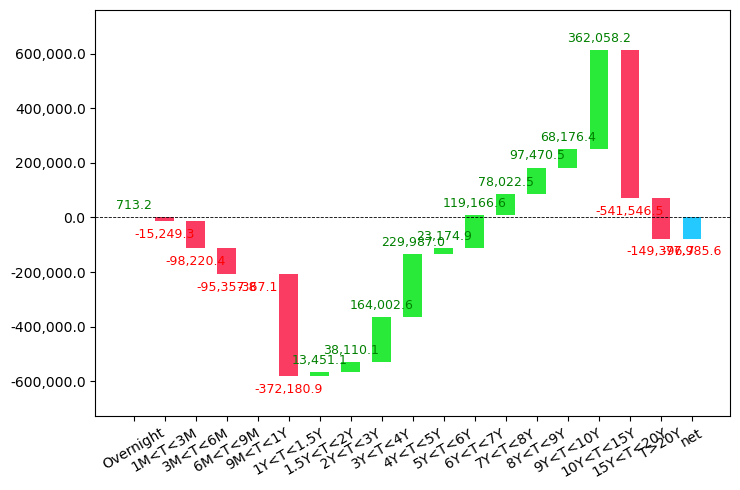

In [436]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7.5,5), 'figure.dpi':100})
a = ['Overnight','1M<T<3M','3M<T<6M','6M<T<9M','9M<T<1Y','1Y<T<1.5Y','1.5Y<T<2Y',
    '2Y<T<3Y','3Y<T<4Y','4Y<T<5Y','5Y<T<6Y','6Y<T<7Y','7Y<T<8Y','8Y<T<9Y','9Y<T<10Y',
    '10Y<T<15Y','15Y<T<20Y','T>20Y']
b = [overnight_c,m1_m3_c,m3_m6_c,m6_m9_c,m9_y1_c,y1_y1_5_c,y1_5_y2_c,y2_y3_c,y3_y4_c,
   y4_y5_c,y5_y6_c,y6_y7_c,y7_y8_c,y8_y9_c,y9_y10_c,y10_y15_c,y15_y20_c,y20_c]
fig = waterfall_chart.plot(a,b)
